You are given a 0-indexed 2D integer array grid of size m x n. Each cell has one of two values:

    0 represents an empty cell,
    1 represents an obstacle that may be removed.

You can move up, down, left, or right from and to an empty cell.

Return the minimum number of obstacles to remove so you can move from the upper left corner (0, 0) to the lower right corner (m - 1, n - 1).

 

Example 1:

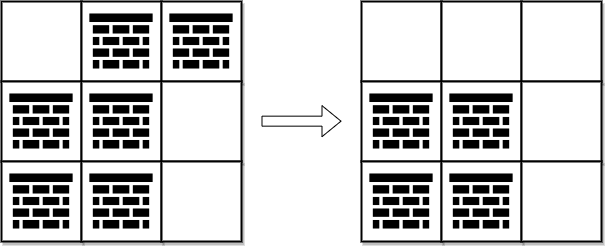

Input: grid = [[0,1,1],[1,1,0],[1,1,0]]
Output: 2
Explanation: We can remove the obstacles at (0, 1) and (0, 2) to create a path from (0, 0) to (2, 2).
It can be shown that we need to remove at least 2 obstacles, so we return 2.
Note that there may be other ways to remove 2 obstacles to create a path.

Example 2:

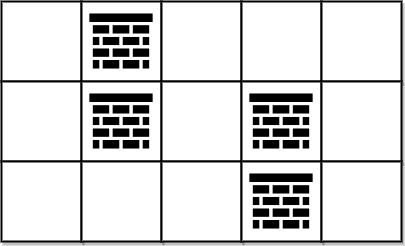

Input: grid = [[0,1,0,0,0],[0,1,0,1,0],[0,0,0,1,0]]
Output: 0
Explanation: We can move from (0, 0) to (2, 4) without removing any obstacles, so we return 0.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 105
    2 <= m * n <= 105
    grid[i][j] is either 0 or 1.
    grid[0][0] == grid[m - 1][n - 1] == 0



In [ ]:
class Solution:
    def minimumObstacles(self, grid: List[List[int]]) -> int:
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        def is_valid(row, col):
            if 0 <= row < len(grid) and 0 <= col < len(grid[0]):
                return True
            return False

        distance = [[float("inf")] * len(grid[0]) for _ in grid]
        distance[0][0] = 0
        
        q = deque([(0, 0, 0)])
        while q:
            dist, row, col = q.popleft()
            for dx, dy in directions:
                new_row, new_col = row + dx, col + dy
                if is_valid(new_row, new_col) and distance[new_row][new_col] == float("inf"):
                    if grid[new_row][new_col] == 0:
                        distance[new_row][new_col] = dist
                        q.appendleft((dist, new_row, new_col))
                    else:
                        distance[new_row][new_col] = dist + 1
                        q.append((dist + 1, new_row, new_col))
        return distance[-1][-1]


In [ ]:
class Solution:
    # Directions for movement: right, left, down, up
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def minimumObstacles(self, grid):
        # Helper method to check if the cell is within the grid bounds
        def _is_valid(row, col):
            return 0 <= row < len(grid) and 0 <= col < len(grid[0])

        m, n = len(grid), len(grid[0])

        # Initialize distance matrix with infinity (large value)
        min_obstacles = [[float("inf")] * n for _ in range(m)]

        # Start from the top-left corner, accounting for its obstacle value
        min_obstacles[0][0] = grid[0][0]

        pq = [(min_obstacles[0][0], 0, 0)]  # (obstacles, row, col)

        while pq:
            obstacles, row, col = heapq.heappop(pq)

            # If we've reached the bottom-right corner, return the result
            if row == m - 1 and col == n - 1:
                return obstacles

            # Explore all four possible directions from the current cell
            for dr, dc in self.directions:
                new_row, new_col = row + dr, col + dc

                if _is_valid(new_row, new_col):
                    # Calculate the obstacles removed if moving to the new cell
                    new_obstacles = obstacles + grid[new_row][new_col]

                    # Update if we've found a path with fewer obstacles to the new cell
                    if new_obstacles < min_obstacles[new_row][new_col]:
                        min_obstacles[new_row][new_col] = new_obstacles
                        heapq.heappush(pq, (new_obstacles, new_row, new_col))

        return min_obstacles[m - 1][n - 1]